In [1]:
import sys
import subprocess
import time
import os
import math
import numpy as np
import linecache
import matplotlib.pyplot as plt
import scipy
import random
import copy
from scipy.optimize import curve_fit
from scipy.stats import bootstrap
import scipy.io as spio
os.chdir('./')

# bGem Dynamics
Below is the code to reproduce the main and supplementary figures associated with investigating the dynamics of different bGEMs.

## Experimental MSD
These are MSD values from the experiments performed by Diana Valverde-Mendez.  We are downloading them here as well because some of the theoretical plots have experimental MSDs on the same plot.

In [2]:
# Import data from experiments:
data_fldr = '../data/MSD_data/Experimental_Data/'

# Average values
msd_40nm_inc = np.load(data_fldr + 'msd_40nm_inc.npy')
msd_50nm_inc = np.load(data_fldr + 'msd_50nm_inc.npy') # stationary phase
msd_20nm_inc = np.load(data_fldr + 'msd_20nm_inc.npy')
msd_p15q_inc = np.load(data_fldr + 'msd_p15q_inc.npy')
msd_n18q_inc = np.load(data_fldr + 'msd_n18q_inc.npy')
msd_50nm_exp_inc = np.load(data_fldr + 'msd_50nm_exp_inc.npy') # exponential phase

# Intervals (for error bars)
msd_40nm_int_inc = np.load(data_fldr + 'msd_40nm_int_inc.npy')
msd_50nm_int_inc = np.load(data_fldr + 'msd_50nm_int_inc.npy')
msd_20nm_int_inc = np.load(data_fldr + 'msd_20nm_int_inc.npy')
msd_p15q_int_inc = np.load(data_fldr + 'msd_p15q_int_inc.npy')
msd_n18q_int_inc = np.load(data_fldr + 'msd_n18q_int_inc.npy')
msd_50nm_exp_int_inc = np.load(data_fldr + 'msd_50nm_exp_int_inc.npy')


# Subtract off calculated error from experiments (see supplement for detail)
sigma_40nm = 1.4345e+04
sigma_50nm = 1.4409e+04
sigma_20nm = 1.5694e+04
sigma_p15q = 1.8897e+04
sigma_n18q = 1.4130e+04
sigma_50nm_exp = 2.1e+04

msd_40nm = msd_40nm_inc - sigma_40nm
msd_50nm = msd_50nm_inc - sigma_50nm
msd_20nm = msd_20nm_inc - sigma_20nm
msd_p15q = msd_p15q_inc - sigma_p15q
msd_n18q = msd_n18q_inc - sigma_n18q
msd_50nm_exp = msd_50nm_exp_inc - sigma_50nm_exp

msd_40nm_int = msd_40nm_int_inc - msd_40nm_inc.reshape(-1,1) 
msd_50nm_int = msd_50nm_int_inc - msd_50nm_inc.reshape(-1,1) 
msd_20nm_int = msd_20nm_int_inc - msd_20nm_inc.reshape(-1,1) 
msd_p15q_int = msd_p15q_int_inc - msd_p15q_inc.reshape(-1,1) 
msd_n18q_int = msd_n18q_int_inc - msd_n18q_inc.reshape(-1,1) 
msd_50nm_exp_int = msd_50nm_exp_int_inc - msd_50nm_exp_inc.reshape(-1,1) 

msd_40nm_int[:,0] *= -1
msd_50nm_int[:,0] *= -1
msd_20nm_int[:,0] *= -1
msd_p15q_int[:,0] *= -1
msd_n18q_int[:,0] *= -1
msd_50nm_exp_int[:,0] *= -1

t_MSD = 0.03 + 0.03*np.arange(0,msd_40nm.shape[0]) # time in seconds
t_MSD_50 = 0.03 + 0.03*np.arange(0,msd_50nm.shape[0])
t_MSD_20 = .1 + 0.1*np.arange(0,msd_20nm.shape[0])

(0.001, 1.0)

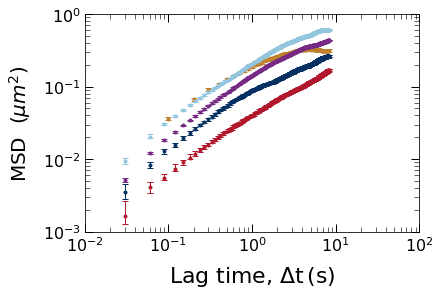

In [3]:
# Plot experiments

start_idx = 0
end_idx = 275
plt.errorbar(t_MSD_20[start_idx:82],     1e-6*msd_20nm[start_idx:82],     yerr = 1e-6*msd_20nm_int[start_idx:82].T ,     marker = '.', linestyle = '', color=(191/255,129/255,45/255),     capsize=3, elinewidth=1, label = '20nm -7')
plt.errorbar(t_MSD[start_idx:end_idx],    1e-6*msd_40nm[start_idx:end_idx], yerr = 1e-6*msd_40nm_int[start_idx:end_idx].T , marker = '.', linestyle = '', color = (146/255,197/255,222/255),  capsize=3, elinewidth=1, label = '40nm -7')
plt.errorbar(t_MSD_50[start_idx:end_idx], 1e-6*msd_50nm[start_idx:end_idx], yerr = 1e-6*msd_50nm_int[start_idx:end_idx].T , marker = '.', linestyle = '', color=(118/255,42/255,131/255),     capsize=3, elinewidth=1, label = '50nm -7')
plt.errorbar(t_MSD[start_idx:end_idx],    1e-6*msd_n18q[start_idx:end_idx], yerr = 1e-6*msd_n18q_int[start_idx:end_idx].T , marker = '.', linestyle = '', color=(5/255,48/255,97/255),        capsize=3, elinewidth=1, label = '40nm -18')
plt.errorbar(t_MSD[start_idx:end_idx],        1e-6*msd_p15q[start_idx:end_idx],     yerr = 1e-6*msd_p15q_int[start_idx:end_idx].T ,     marker = '.', linestyle = '', color=(178/255,24/255,43/255),      capsize=3, elinewidth=1, label = '40nm +15')
#plt.plot(t_lag4, 1e-6*MSD4, label = 'small_in')

#82 for 20s, 275 for others (steps)

#plt.legend(loc="upper left", frameon=False, fontsize=11)

plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.family"] = "Cambria"
plt.ylabel('MSD  $\mathdefault{(\it{\mu} m^2)}$',size=20,labelpad=10)
plt.xlabel('Lag time, $\mathdefault{\Delta t  \, (s)}$',size=22,labelpad=10)
#plt.title('MSD at different volume fractions',fontsize=20,pad=10)
plt.tick_params(direction="in",axis='both', which='major', right = True, top = True, width=1, length=8, labelsize=16)
plt.tick_params(direction="in", axis='both', which='minor', right = True, top = True, length=5, labelsize=16)

plt.yscale('log')
plt.xscale('log')

lims = np.array([1e-2, 1e2])
lims_y = np.array([1e-3, 1e0])
plt.xlim(lims)
plt.ylim(lims_y)

## Colloidal whole-cell MSD
These are MSD values from the colloidal whole cell simulations.

In [4]:
gem_array = ['15q', 'n7q', 'n18q', '20nm', '50nm'] # the charged ones are charge per GFP and 40nm
data_fldr = '../data/MSD_data/whole_cell_colloidal_sim_data/'
MSD_dict = dict()
MSD_dict_old = dict()
for gem_name in gem_array:

    # Construct the file name with the new format
    file_msd = f"{data_fldr}MSD.gems_only.{gem_name}.txt"
    msd = np.genfromtxt(file_msd)
    MSD_dict[gem_name, 'total'] = msd


    file_msd = f"{data_fldr}MSD.gems_only.{gem_name}.in.txt"
    msd_in = np.genfromtxt(file_msd)[1:]
    MSD_dict[gem_name, 'in'] = msd_in
    
    file_msd = f"{data_fldr}MSD.gems_only.{gem_name}.out.txt"
    msd_out = np.genfromtxt(file_msd)[1:]
    MSD_dict[gem_name, 'out'] = msd_out

15q
0.8359736297699063 0.029528094827500864
[0.03583626]

n7q
0.8741048788484996 0.4810111736378679
[0.42931536]

n18q
0.891192639358857 0.48623763293387556
[0.37823536]

20nm
0.9036421260870531 1.9373816567480473
[1.36315252]

50nm
0.8742108120155445 0.2988645617349663
[0.26651321]



(7e-06, 0.04)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


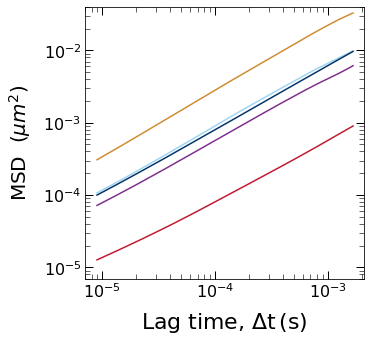

In [5]:
# Plot the MSD values.
# Also perform fits that obtain the diffusion coefficient and power-law coefficient

gem_array = ['15q', 'n7q', 'n18q', '20nm', '50nm']

colors = [(178/235,24/235,43/235), (146/235,197/235,222/235), (5/235,48/235,97/235), (191/235,129/235,45/235), (118/235,42/235,131/235)]

a = 7e-9 #m
k = 1.38e-23 # m^2 kg / s^2 k
T = 298 # K
eta = 8.9e-4 # Pa*s
D = k*T/(6*np.pi*eta*a)
dt = 8*2*1e-5 # due to converting lammps units, 2 is our given timestep
t_conv_s = dt*a**2/D  # multiply timestep by this to get BT in seconds
msd_conv_um = (2*a)**2*(1e6)**2 #um^2



start = 3 
end = 750 # after this the data becomes noisy so we only calculated dynamics up to here though our simulation was longer

# For fitting, pick region that is uncorrelated yet not experiencing confinement for all bGEMs.
start_fit = 60 
end_fit = 190 

for i, gem_type in enumerate(gem_array):
    t_msd = t_conv_s * MSD_dict[gem_type, 'total'][start:end, 0]
    msd = msd_conv_um * MSD_dict[gem_type, 'total'][start:end, 1]
    
    print(gem_type)

    x = t_msd[start_fit:end_fit]
    y = msd[start_fit:end_fit]
    alpha, delta = np.polyfit(np.log10(x),np.log10(y),1)
    D_alt = (10**delta)/6 
    print(alpha, D_alt)
    alpha = 0.86 # pick this value to obtain diffusivity so that all diffusion coefficients have same units
    def anom_diff(t,D):
        return 6*D*t**(alpha)
    D, var = curve_fit(anom_diff,x, y)
    print(D)
    y_fit = anom_diff(x,D) 
    y_logfit = 6*D_alt*x**alpha
    plt.plot(t_msd, msd, color=colors[i], label=gem_type)
    print()

#82 for 20s, 275 for others (steps)

#plt.legend(loc="upper left", frameon=False, fontsize=11)

plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.family"] = "Cambria"
plt.ylabel('MSD  $\mathdefault{(\it{\mu} m^2)}$',size=20,labelpad=10)
plt.xlabel('Lag time, $\mathdefault{\Delta t  \, (s)}$',size=22,labelpad=10)
#plt.title('MSD at different volume fractions',fontsize=20,pad=10)
plt.tick_params(direction="in",axis='both', which='major', right = True, top = True, width=1, length=8, labelsize=16)
plt.tick_params(direction="in", axis='both', which='minor', right = True, top = True, length=5, labelsize=16)

plt.yscale('log')
plt.xscale('log')


lims = np.array([7e-6, 2.1e-3])
lims_y = np.array([7e-6, 4e-2])
plt.xlim(lims)
plt.ylim(lims_y)

15q


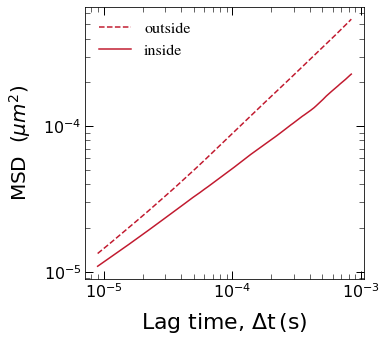

n7q


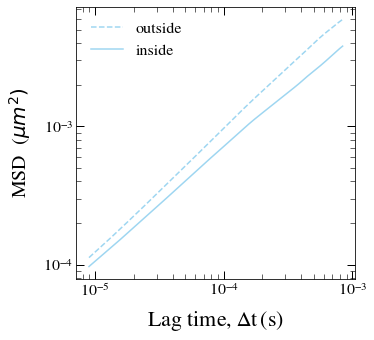

n18q


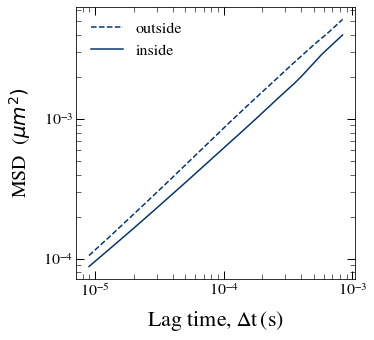

20nm


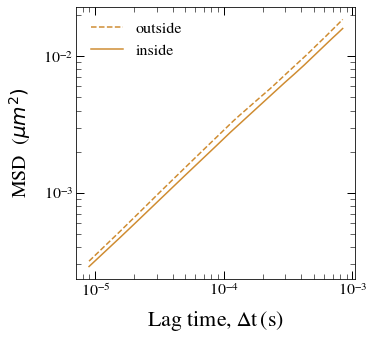

50nm


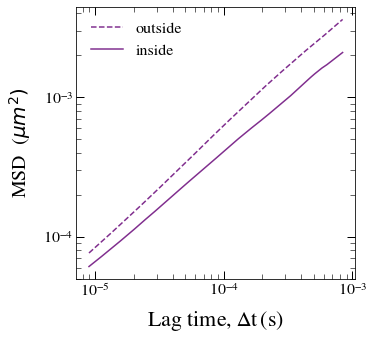

In [6]:
# Plot inside versus outside the nucleoid.
import numpy as np
import matplotlib.pyplot as plt

gem_array = ['15q', 'n7q', 'n18q', '20nm', '50nm']
colors = [(178/235,24/235,43/235), (146/235,197/235,222/235), (5/235,48/235,97/235), (191/235,129/235,45/235), (118/235,42/235,131/235)]

a = 7e-9 # m
k = 1.38e-23 # m^2 kg / s^2 K
T = 298 # K
eta = 8.9e-4 # Pa*s
D = k*T/(6*np.pi*eta*a)
dt = 8*2*1e-5 # due to converting LAMMPS units, 2 is the given timestep
t_conv_s = dt*a**2/D  # multiply timestep by this to get BT in seconds
msd_conv_um = (2*a)**2*(1e6)**2 # um^2

start = 3
end = 375 # data gets very noisy because its hard to find a trajectory where bGEM stays inside or outside the entire duration

start_fit = 60
end_fit = 190

for i, gem_type in enumerate(gem_array):
    t_msd = t_conv_s * MSD_dict[gem_type, 'total'][start:end, 0]
    msd_in = msd_conv_um * MSD_dict[gem_type, 'in'][start:end]
    msd_out = msd_conv_um * MSD_dict[gem_type, 'out'][start:end]
    print(gem_type)

    plt.plot(t_msd, msd_out, color=colors[i],linestyle='--', label='outside')
    plt.plot(t_msd, msd_in, color=colors[i], label='inside')

    plt.rcParams["figure.figsize"] = (5, 5)
    plt.rcParams["font.family"] = "Nimbus Roman"
    plt.ylabel('MSD  $\mathdefault{(\it{\mu} m^2)}$', size=20, labelpad=10)
    plt.xlabel('Lag time, $\mathdefault{\Delta t  \, (s)}$', size=22, labelpad=10)
    plt.tick_params(direction="in", axis='both', which='major', right=True, top=True, width=1, length=8, labelsize=16)
    plt.tick_params(direction="in", axis='both', which='minor', right=True, top=True, length=5, labelsize=16)

    plt.yscale('log')
    plt.xscale('log')

    plt.legend(loc="upper left", frameon=False, fontsize=16)
    #plt.savefig(f'MSD_{gem_type}.pdf', dpi=1000, bbox_inches="tight")
    #plt.clf() # Clear the figure for the next plot
    plt.show()  

In [7]:
# Calculate diffusivity inside and outside for event-based long-time simulations.
# We will use the experimental diffusivity found by fitting a uniform random walk.
# Then we will use the penetrability and relative diffusion inside and outside to calculate the parameters.
# We compare the MSD at a timestep where particles diffuse roughly the amount they need to for the event-based simulation.
# Since the diffusivity in the colloidal model is significantly faster than inside the cell, this timescale becomes much shorter than the timestep in experiments.


pen_rate = np.array([.25, .39, .41, .6, .32])
D_bulk = np.array([.0122, 0.0674, 0.0259, 0.0791, 0.0397])
#D_bulk = np.array([.0122, 0.0718, 0.0259, 0.0791, 0.0397])
i = 0
for gem_name in gem_array:
    print(gem_name)
    ratio = MSD_dict[gem_name,'in'][5]/MSD_dict[gem_name,'out'][5]
    D_out = D_bulk[i]/(pen_rate[i]*ratio + 1 - pen_rate[i])
    i+=1
    print(D_out)
    print(D_out*ratio)
    print()

15q
0.012909183138756043
0.010072450583731875

n7q
0.07172282490421929
0.06063865848314421

n18q
0.028022042209541922
0.022846329503342113

20nm
0.08385533218577809
0.0759297785428146

50nm
0.042816497909633454
0.0330774419420289



## Event-based probabilistic long-time simulations.
These are MSD values from the event-based simulations that enable us to simulate the trajectory of just bGEMs for a long duration in order to study the impact of confinement. The data we present is for a uniform diffusion coefficient, since, as we explain in the SI, having a distinct diffusion coefficient inside and outside the nucleoid did not change our results.

In [8]:
# Import all the long-time simulations into a dictionary:
data_fldr = '../data/MSD_data/event_based_long_time_sim_data/'

t_dict = dict() # simulation time in s
t_lag_dict = dict() # lag time for MSD calculations in s
tot_out_dict = dict() # number of particles outside the nucleoid (500 total) 
MSD_dict = dict() # mean-squared displacement in nm^2

# See SI or readme file for more description on what each numerical experiment represents.
experiments = [
    '20nm_confined', # bGEMs confined to inside or outside 
    '20nm_free', # bGEMs can diffuse from inside to outside the nucleoid region (with a probability set to match experimental observations)
    '20nm_in', # all bGEMs in the nucleoid
    '50nm_free', # bGEMs can diffuse from inside to outside the nucleoid region (with a probability set to match experimental observations)
    '50nm_confined', # bGEMs confined to inside or outside 
    '40nm_q15_free', # bGEMs can diffuse from inside to outside the nucleoid region (with a probability set to match experimental observations)
    '40nm_q15_confined', # bGEMs confined to inside or outside 
    '40nm_q-7_free', # bGEMs can diffuse from inside to outside the nucleoid region (with a probability set to match experimental observations)
    '40nm_q-7_confined', # bGEMs confined to inside or outside 
    '40nm_q-18_free', # bGEMs can diffuse from inside to outside the nucleoid region (with a probability set to match experimental observations)
    '40nm_q-18_confined' # bGEMs confined to inside or outside 
]

for exp_name in experiments:
    t_dict[exp_name] = np.genfromtxt(data_fldr + 't_' + exp_name + '.txt')
    t_lag_dict[exp_name] = np.genfromtxt(data_fldr + 't_lag_' + exp_name + '.txt')
    MSD_dict[exp_name] = np.genfromtxt(data_fldr + 'MSD_' + exp_name + '.txt')
    tot_out_dict[exp_name] = np.genfromtxt(data_fldr + 'tot_out_' + exp_name + '.txt')

In [9]:
# Diffusion coefficients chosen to best match experimental data:
D_50nm = 39654.090480734834 #nm^2/s
D_15q = 12256.718875863495 #nm^2/s
D_18q = 25927.67454509585 #nm^2/s
D_40nm = 67411.95381724921 #nm^2/s
D_20nm = 79075.6056507322 #nm^2/s

D_sim = 67411.95381724921 # nm^2/s ran simulations with this diffusivity

# Ran all the simulations at the same diffusivity and timestep.  
# We can rescale timestep by diffusivity to get the correct MSD behavior that matches experiments.
exp_name = '20nm_free'
t_lag_20nm = (D_sim/D_20nm)*t_lag_dict[exp_name]

exp_name = '40nm_q-7_free'
t_lag_40nm = (D_sim/D_40nm)*t_lag_dict[exp_name]

exp_name = '50nm_free'
t_lag_50nm = (D_sim/D_50nm)*t_lag_dict[exp_name]

exp_name = '40nm_q15_free'
t_lag_15q = (D_sim/D_15q)*t_lag_dict[exp_name]

exp_name = '40nm_q-18_free'
t_lag_18q = (D_sim/D_18q)*t_lag_dict[exp_name]


findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


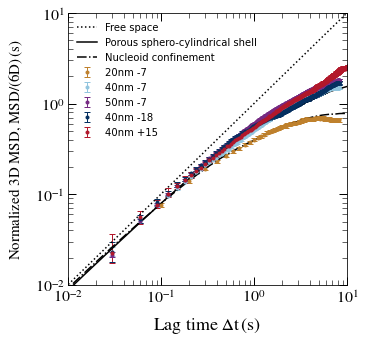

In [10]:
# Plot the main figure, with all experimental results collapsed onto diffusion throughout the cell.
# The exception is the 20 nm bGEM, which follows more closely diffusion of all bGEMS confined inside the nucleoid.
start_idx = 0
end_idx = 275
plt.errorbar(t_MSD_20[start_idx:82], 
             1e-6 * msd_20nm[start_idx:82] / (6 * D_20nm * 1e-6), 
             yerr=1e-6 * msd_20nm_int[start_idx:82].T / (6 * D_20nm * 1e-6), 
             marker='.', linestyle='', color=(191/255,129/255,45/255), 
             capsize=3, elinewidth=1, label='20nm -7')

plt.errorbar(t_MSD[start_idx:end_idx], 
             1e-6 * msd_40nm[start_idx:end_idx] / (6 * D_40nm * 1e-6), 
             yerr=1e-6 * msd_40nm_int[start_idx:end_idx].T / (6 * D_40nm * 1e-6), 
             marker='.', linestyle='', color=(146/255,197/255,222/255), 
             capsize=3, elinewidth=1, label='40nm -7')

plt.errorbar(t_MSD_50[start_idx:end_idx], 
             1e-6 * msd_50nm[start_idx:end_idx] / (6 * D_50nm * 1e-6), 
             yerr=1e-6 * msd_50nm_int[start_idx:end_idx].T / (6 * D_50nm * 1e-6), 
             marker='.', linestyle='', color=(118/255,42/255,131/255), 
             capsize=3, elinewidth=1, label='50nm -7')

plt.errorbar(t_MSD[start_idx:end_idx], 
             1e-6 * msd_n18q[start_idx:end_idx] / (6 * D_18q * 1e-6), 
             yerr=1e-6 * msd_n18q_int[start_idx:end_idx].T / (6 * D_18q * 1e-6), 
             marker='.', linestyle='', color=(5/255,48/255,97/255), 
             capsize=3, elinewidth=1, label='40nm -18')

plt.errorbar(t_MSD[start_idx:375], 
             1e-6 * msd_p15q[start_idx:375] / (6 * D_15q * 1e-6), 
             yerr=1e-6 * msd_p15q_int[start_idx:375].T / (6 * D_15q * 1e-6), 
             marker='.', linestyle='', color=(178/255,24/255,43/255), 
             capsize=3, elinewidth=1, label='40nm +15')

expt = '40nm_q-7_free'
plt.plot(np.insert(t_lag_40nm, 0, 0.0), 
         np.insert(t_lag_40nm, 0, 0.0), 
         linestyle='dotted', color='black', label='Free space')

plt.plot(np.insert(t_lag_40nm, 0, 0.0), 
         np.insert(MSD_dict[expt], 0, 0.0) / (6 * D_40nm), 
         color='black', label='Porous sphero-cylindrical shell')

expt = '20nm_in'
plt.plot(np.insert(t_lag_20nm, 0, 0.0), 
         np.insert(MSD_dict[expt], 0, 0.0) / (6 * D_20nm), 
         linestyle='dashdot', label='Nucleoid confinement', color='black')

# General plot settings
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["font.family"] = "Cambria"
plt.ylabel(r'Normalized 3D MSD, $\mathdefault{MSD / (6D) \, (s)}$', size=15, labelpad=10)
plt.xlabel(r'Lag time $\mathdefault{\Delta t  \, (s)}$', size=18, labelpad=10)
plt.tick_params(direction="in", axis='both', which='major', right=True, top=True, width=1, length=8, labelsize=16)
plt.tick_params(direction="in", axis='both', which='minor', right=True, top=True, length=5, labelsize=16)
plt.yscale('log')
plt.xscale('log')

lims_y = np.array([1e-2, 1e1])
plt.xlim(lims_y)
plt.ylim(lims_y)
plt.legend(frameon=False, loc="upper left")
plt.show()

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


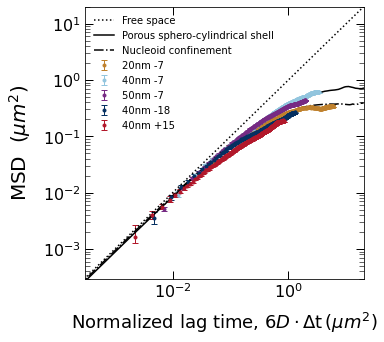

In [11]:
# Renormalize time instead of MSD

start_idx = 0
end_idx = 275
plt.errorbar(6*t_MSD_20[start_idx:125]*D_20nm*1e-6,     1e-6*msd_20nm[start_idx:125],     yerr = 1e-6*msd_20nm_int[start_idx:125].T ,     marker = '.', linestyle = '', color=(191/255,129/255,45/255),     capsize=3, elinewidth=1, label = '20nm -7')
plt.errorbar(6*t_MSD[start_idx:end_idx]*D_40nm*1e-6,    1e-6*msd_40nm[start_idx:end_idx], yerr = 1e-6*msd_40nm_int[start_idx:end_idx].T , marker = '.', linestyle = '', color = (146/255,197/255,222/255),  capsize=3, elinewidth=1, label = '40nm -7')
plt.errorbar(6*t_MSD_50[start_idx:end_idx]*D_50nm*1e-6, 1e-6*msd_50nm[start_idx:end_idx], yerr = 1e-6*msd_50nm_int[start_idx:end_idx].T , marker = '.', linestyle = '', color=(118/255,42/255,131/255),     capsize=3, elinewidth=1, label = '50nm -7')
plt.errorbar(6*t_MSD[start_idx:end_idx]*D_18q*1e-6,    1e-6*msd_n18q[start_idx:end_idx], yerr = 1e-6*msd_n18q_int[start_idx:end_idx].T , marker = '.', linestyle = '', color=(5/255,48/255,97/255),        capsize=3, elinewidth=1, label = '40nm -18')
plt.errorbar(6*t_MSD[start_idx:375]*D_15q*1e-6,        1e-6*msd_p15q[start_idx:375],     yerr = 1e-6*msd_p15q_int[start_idx:375].T ,     marker = '.', linestyle = '', color=(178/255,24/255,43/255),      capsize=3, elinewidth=1, label = '40nm +15')


expt = '40nm_q-7_free'
#plt.plot(t_lag*t_ratio, 1e-6*MSD_dict[expt], label = 'mc fit')
#plt.plot(t_lag/2, 1*1e-6*MSD_dict['40nm_q-7_free'], color = 'black', label = 'random walk')
plt.plot(6*np.insert(t_lag_40nm, 0, 0.0)*D_40nm*1e-6, 6*np.insert(t_lag_40nm, 0, 0.0)*D_40nm*1e-6, linestyle = 'dotted', color = 'black', label = 'Free space')
plt.plot(6*np.insert(t_lag_40nm, 0, 0.0)*D_40nm*1e-6, 1e-6*np.insert(MSD_dict[expt], 0, 0.0), color = 'black', label = 'Porous sphero-cylindrical shell')
expt = '20nm_in'
plt.plot(6*np.insert(t_lag_20nm, 0, 0.0)*D_20nm*1e-6, 1e-6*np.insert(MSD_dict[expt], 0, 0.0), linestyle = 'dashdot', label = 'Nucleoid confinement', color = 'black')

t_MSD = 0.03 + 0.03*np.arange(0,msd_40nm.shape[0])


plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.family"] = "Cambria"
plt.ylabel('MSD  $\mathdefault{(\it{\mu} m^2)}$',size=20,labelpad=10)
plt.xlabel('Normalized lag time, $6 D\cdot \mathdefault{\Delta t  \, (\it{\mu} m^2)}$',size=18,labelpad=10)
#plt.title('MSD at different volume fractions',fontsize=20,pad=10)
plt.tick_params(direction="in",axis='both', which='major', right = True, top = True, width=1, length=8, labelsize=16)
plt.tick_params(direction="in", axis='both', which='minor', right = True, top = True, length=5, labelsize=16)

plt.yscale('log')
plt.xscale('log')

lims_x = np.array([3e-4, 2e1])
plt.xlim(lims_x)
plt.ylim(lims_x)
plt.legend(frameon=False,loc="upper left")

(0.009, 0.8)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


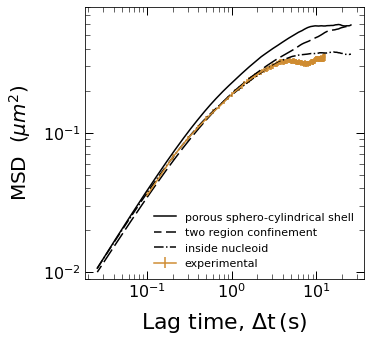

In [12]:
# Plot models for 20 nm bGEM.

start_idx = 0
end_idx = 275
plt.errorbar(t_MSD_20[start_idx:125],      1e-6*msd_20nm[start_idx:125],      yerr = 1e-6*msd_20nm_int[start_idx:125].T , color=(191/235,129/235,45/235),     label = 'experimental')

expt = '20nm_free'
start = 5
end = -18000
plt.plot(t_lag_20nm[start:end], 1e-6*MSD_dict[expt][start:end], label = 'porous sphero-cylindrical shell', linestyle = 'solid', color = 'black')
expt = '20nm_confined'
plt.plot(t_lag_20nm[start:end], 1e-6*MSD_dict[expt][start:end], label = 'two region confinement', linestyle = (5, (10, 3)), color = 'black')
#plt.plot(t_lag, 6*1e-6*D_20*t_lag, label = '6Dt')
expt = '20nm_in'
plt.plot(t_lag_20nm[start:end], 1e-6*MSD_dict[expt][start:end], label = 'inside nucleoid', linestyle = 'dashdot', color = 'black')


plt.legend(loc="upper left", frameon=False, fontsize=11)
plt.legend( frameon=False, fontsize=11)

plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.family"] = "Cambria"
plt.ylabel('MSD  $\mathdefault{(\it{\mu} m^2)}$',size=20,labelpad=10)
plt.xlabel('Lag time, $\mathdefault{\Delta t  \, (s)}$',size=22,labelpad=10)
plt.tick_params(direction="in",axis='both', which='major', right = True, top = True, width=1, length=8, labelsize=16)
plt.tick_params(direction="in", axis='both', which='minor', right = True, top = True, length=5, labelsize=16)

plt.yscale('log')
plt.xscale('log')

lims = np.array([1e-5, 2e-3])
lims_y = np.array([9e-3,8e-1])
plt.ylim(lims_y)

(0.001, 1.0)

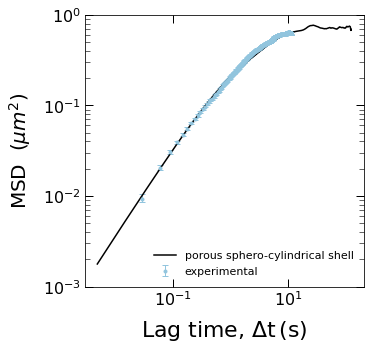

In [13]:
# Plot models for 40 nm -7 charge bGEM .

start_idx = 0
end_idx = 375
plt.errorbar(t_MSD[start_idx:end_idx],    1e-6*msd_40nm[start_idx:end_idx], yerr = 1e-6*msd_40nm_int[start_idx:end_idx].T , marker = '.', linestyle = '', color = (146/255,197/255,222/255),  capsize=3, elinewidth=1, label = 'experimental')

expt = '40nm_q-7_free'
plt.plot(t_lag_40nm, 1e-6*MSD_dict[expt], label = 'porous sphero-cylindrical shell', linestyle = 'solid', color = 'black')



plt.legend(frameon=False, fontsize=11)

plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.family"] = "Cambria"
plt.ylabel('MSD  $\mathdefault{(\it{\mu} m^2)}$',size=20,labelpad=10)
plt.xlabel('Lag time, $\mathdefault{\Delta t  \, (s)}$',size=22,labelpad=10)
#plt.title('MSD at different volume fractions',fontsize=20,pad=10)
plt.tick_params(direction="in",axis='both', which='major', right = True, top = True, width=1, length=8, labelsize=16)
plt.tick_params(direction="in", axis='both', which='minor', right = True, top = True, length=5, labelsize=16)

plt.yscale('log')
plt.xscale('log')

lims_y = np.array([1e-3,1e0])
plt.ylim(lims_y)

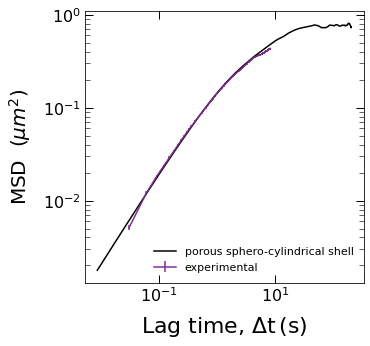

In [14]:
# Plot models for 50 nm bGEM.

start_idx = 0
end_idx = 275
plt.errorbar(t_MSD_50[start_idx:end_idx], 1e-6*msd_50nm[start_idx:end_idx], yerr = 1e-6*msd_50nm_int[start_idx:end_idx].T , color=(118/235,42/235,131/235),      label = 'experimental')

expt = '50nm_free'
plt.plot(t_lag_50nm, 1e-6*MSD_dict[expt], label = 'porous sphero-cylindrical shell', linestyle = 'solid', color = 'black')


plt.legend(frameon=False, fontsize=11)

plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.family"] = "Cambria"
plt.ylabel('MSD  $\mathdefault{(\it{\mu} m^2)}$',size=20,labelpad=10)
plt.xlabel('Lag time, $\mathdefault{\Delta t  \, (s)}$',size=22,labelpad=10)
#plt.title('MSD at different volume fractions',fontsize=20,pad=10)
plt.tick_params(direction="in",axis='both', which='major', right = True, top = True, width=1, length=8, labelsize=16)
plt.tick_params(direction="in", axis='both', which='minor', right = True, top = True, length=5, labelsize=16)

plt.yscale('log')
plt.xscale('log')


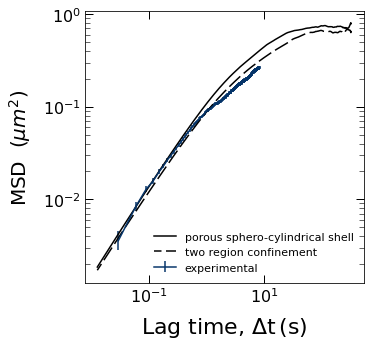

In [15]:
# Plot models for 40 nm -18 charge bGEM .

start_idx = 0
end_idx = 275
plt.errorbar(t_MSD[start_idx:end_idx],    1e-6*msd_n18q[start_idx:end_idx], yerr = 1e-6*msd_n18q_int[start_idx:end_idx].T , color=(5/235,48/235,97/235),        label = 'experimental')
expt = '40nm_q-18_free'
plt.plot(t_lag_18q, 1e-6*MSD_dict[expt], label = 'porous sphero-cylindrical shell', linestyle = 'solid', color = 'black')
expt = '40nm_q-18_confined'
plt.plot(t_lag_18q, 1e-6*MSD_dict[expt], label = 'two region confinement', linestyle = (5, (10, 3)), color = 'black')



plt.legend(frameon=False, fontsize=11)

plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.family"] = "Cambria"
plt.ylabel('MSD  $\mathdefault{(\it{\mu} m^2)}$',size=20,labelpad=10)
plt.xlabel('Lag time, $\mathdefault{\Delta t  \, (s)}$',size=22,labelpad=10)
#plt.title('MSD at different volume fractions',fontsize=20,pad=10)
plt.tick_params(direction="in",axis='both', which='major', right = True, top = True, width=1, length=8, labelsize=16)
plt.tick_params(direction="in", axis='both', which='minor', right = True, top = True, length=5, labelsize=16)

plt.yscale('log')
plt.xscale('log')



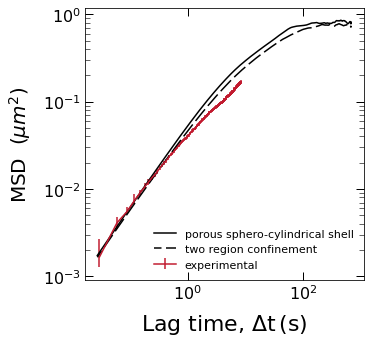

In [16]:
# Plot models for 40 nm +15 charge bGEM .

start_idx = 0
end_idx = 275
plt.errorbar(t_MSD[start_idx:end_idx],    1e-6*msd_p15q[start_idx:end_idx], yerr = 1e-6*msd_p15q_int[start_idx:end_idx].T , color=(178/235,24/235,43/235),      label = 'experimental')
expt = '40nm_q15_free'
plt.plot(t_lag_15q, 1e-6*MSD_dict[expt], label = 'porous sphero-cylindrical shell', linestyle = 'solid', color = 'black')
expt = '40nm_q15_confined'
plt.plot(t_lag_15q, 1e-6*MSD_dict[expt], label = 'two region confinement', linestyle = (5, (10, 3)), color = 'black')



plt.legend( frameon=False, fontsize=11)

plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.family"] = "Cambria"
plt.ylabel('MSD  $\mathdefault{(\it{\mu} m^2)}$',size=20,labelpad=10)
plt.xlabel('Lag time, $\mathdefault{\Delta t  \, (s)}$',size=22,labelpad=10)
#plt.title('MSD at different volume fractions',fontsize=20,pad=10)
plt.tick_params(direction="in",axis='both', which='major', right = True, top = True, width=1, length=8, labelsize=16)
plt.tick_params(direction="in", axis='both', which='minor', right = True, top = True, length=5, labelsize=16)

plt.yscale('log')
plt.xscale('log')


### Exponential phase MSD
Here, we present the data for the same event-based long-time diffusion simulation but in the exponential phase.  This means we explicitley represent the nucleoid's bi-lobed structure during exponential growth.

In [17]:
# Diffusion coefficient chosen to best match experimental data
D_50nm_exp = 51855.349090191696 # #nm^2/s

# Larger nucleoid radius prevents migration between caps and interlobe region
exp_name = '50nm_block_small'
t_dict[exp_name] =  np.genfromtxt(data_fldr+'t_' + exp_name +'.txt')
t_lag_dict[exp_name] = np.genfromtxt(data_fldr+'t_lag_' + exp_name + '.txt')
MSD_dict[exp_name] = np.genfromtxt(data_fldr+'MSD_' + exp_name +'.txt')
tot_out_dict[exp_name] = np.genfromtxt(data_fldr+'tot_out_' + exp_name + '.txt')

# Smaller nucleoid radius allows migration between caps and interlobe region
exp_name = '50nm_full_small'
t_dict[exp_name] =  np.genfromtxt(data_fldr+'t_' + exp_name +'.txt')
t_lag_dict[exp_name] = np.genfromtxt(data_fldr+'t_lag_' + exp_name + '.txt')
MSD_dict[exp_name] = np.genfromtxt(data_fldr+'MSD_' + exp_name +'.txt')
tot_out_dict[exp_name] = np.genfromtxt(data_fldr+'tot_out_' + exp_name + '.txt')

D_sim = 73300 #nm^2/s ran simulations with this diffusivity
t_lag_50nm_exp = (D_sim/D_50nm_exp)*t_lag_dict[exp_name]

(0.002, 2.2)

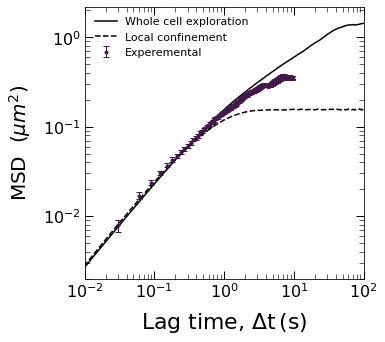

In [18]:
# Plot models for 50 bGEM in the exponential phase

start_idx = 0
end_idx_stat = 495
end_idx_exp = 315


exp_name = '50nm_full_small'
plt.plot(t_lag_50nm_exp, 1e-6*MSD_dict[exp_name],'k', label = 'Whole cell exploration' )
plt.errorbar(t_MSD_50[start_idx:end_idx_exp], 1e-6*msd_50nm_exp[start_idx:end_idx_exp], yerr = 1e-6*msd_50nm_exp_int[start_idx:end_idx_exp].T , marker = '.', linestyle = '', color=(67/255,24/255,75/255),     capsize=3, elinewidth=1, label = 'Experemental')


exp_name = '50nm_block_small'
plt.plot(t_lag_50nm_exp, 1e-6*MSD_dict[exp_name],  'k--',label = 'Local confinement')
    
    
    
 
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["font.family"] = "Cambria"
plt.ylabel('MSD  $\mathdefault{(\it{\mu} m^2)}$',size=20,labelpad=10)
plt.xlabel('Lag time, $\mathdefault{\Delta t  \, (s)}$',size=22,labelpad=10)
#plt.title('MSD at different volume fractions',fontsize=20,pad=10)
plt.tick_params(direction="in",axis='both', which='major', right = True, top = True, width=1, length=8, labelsize=16)
plt.tick_params(direction="in", axis='both', which='minor', right = True, top = True, length=5, labelsize=16)

plt.yscale('log')
plt.xscale('log')
plt.legend(loc="upper left", frameon=False, fontsize=11)

lims = np.array([1e-2, 1e2])
lims_y = np.array([2e-3, 2e0])
lims = np.array([1e-2, 100])
lims_y = np.array([2e-3, 2.2])
plt.xlim(lims)
plt.ylim(lims_y)
